In [1]:
import stegoton
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation
import numpy as np

import stegoton_shapes 

# Overview

In this notebook we investigate the variation in shape (as a function of amplitude) of stegotons.  LeVeque and Yong observed (by measuring the wave as a function of time at a fixed point in space) that stegotons have something close to a $sech^2$ shape, with their width scaling like the reciprocal square root of their amplitude.  In this way they are similar to KdV solitons.

The KdV equation 
$$
    u_t + \frac{1}{2} (u^2)_x + u_{xxx} = 0
$$
has a linear dispersive term, whereas the dispersive terms in the LY homogenized equations are nonlinear.  A simple PDE with nonlinear dispersion is the K(2,2) compacton equation
$$
    u_t + (u^2)_x + (u^2)_{xxx} = 0.
$$
The latter equation has solitons with a different shape:
$$
    u(x,t) = A \cos^2(B(x-Ct)).
$$
A connection for stegotons with the compacton equation was made in my PhD thesis from a theoretical standpoint.  From the homogenized equations of LeVeque & Yong one can see that the leading dispersive terms are a sum of linear and nonlinear parts.

It seems therefore unsurprising that stegotons of small amplitude have a nearly $sech^2$ shape, while large-amplitude stegotons have a $\cos^2$ (or mabye even steeper) shape.

# A train of solitary waves
First we generate a long train of solitary waves of descending amplitude.  One issue with investigating large-amplitude stegotons is that there seems to be a limit on how large they can get without leading to shock formation.  The initial pulse in the simulation below is just large enough that some ripples appear, probably caused by a little shock formation.

In [2]:
claw = stegoton_shapes.setup(num_output_times=200,amp=0.17,cells_per_layer=40,width=30,tfinal=800.,
                             solver_type="sharpclaw",outdir="_wave_train")
claw.run()

{'cflmax': 1.970072869234719,
 'dtmin': 0.030649201283718373,
 'dtmax': 0.0487499803944482,
 'numsteps': 25073}

## Rescale and re-center
We now find the peaks of the stegotons and then shift them all to $x=0$.  Then we rescale them to have amplitude 1, also rescaling their width.

In the code that follows we only plot the largest and smallest stegotons; plotting the others makes it hard to see the details.

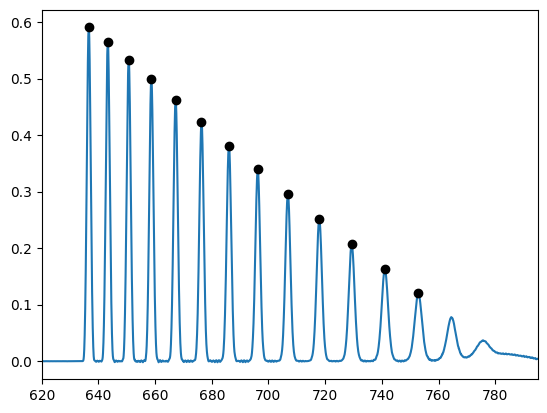

In [3]:
g = np.loadtxt("./_wave_train/_gauges/gauge590.75.txt")
tt = g[:,0]
rhou = g[:,2]
rho = 4
u = rhou/rho
plt.plot(tt,-u)
plt.xlim(620,795)
#plt.xlim(658,680)
delta = np.diff(-u)
dd = delta[1:]*delta[:-1] * (u[2:]<-0.1)
peaks = np.where(dd<0)
plt.plot(tt[peaks],-u[peaks],'ok')

In [4]:
tt[peaks]

array([636.55802347, 643.27522698, 650.68253374, 658.65124691,
       667.21358613, 676.34921543, 686.03601394, 696.19472935,
       706.83057084, 717.91315868, 729.31527979, 741.0420412 ,
       752.85189003])

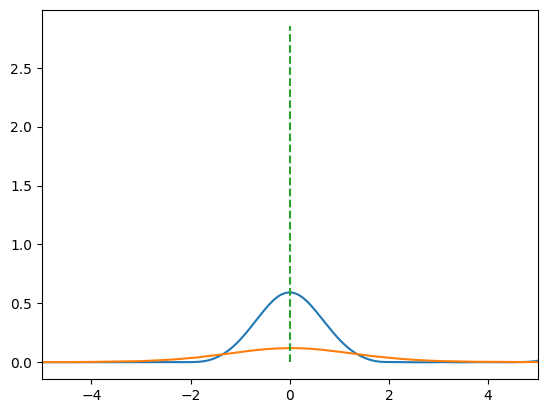

In [5]:
centers = np.array([636.6, 752.86])# 643.29052281, 650.68345809, 658.6454708 ,
       #667.22, 676.37889282,
       #686.02734809, 696.2038154 ,
       #706.86557607, 717.89074234, 729.31871731, 741.01,
       #752.82, 764.5])#+0.05
for c in centers:
    plt.plot(tt-c,-u)
plt.plot([0,0],[0,2.85],"--")
plt.xlim(-5,5);

In [6]:
-u[peaks]

array([0.59099439, 0.564083  , 0.53293844, 0.49895139, 0.46154875,
       0.42362441, 0.3808486 , 0.33965214, 0.29503269, 0.25138798,
       0.20691174, 0.16309641, 0.11977539])

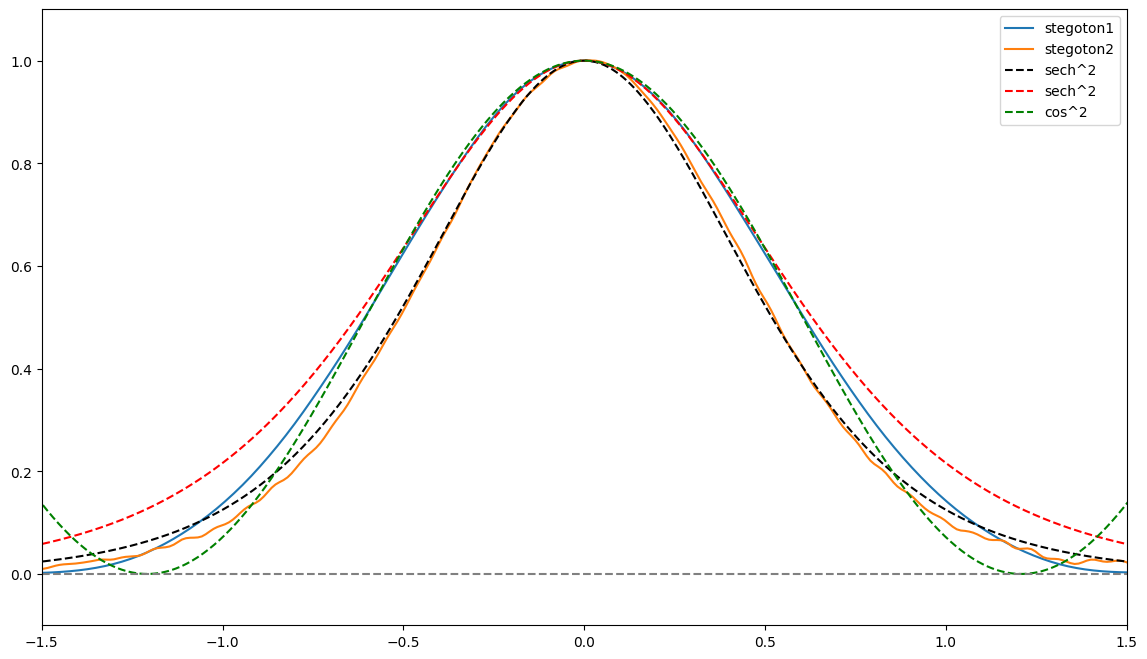

In [7]:
amplitudes = np.array([2.36945698,0.47904089])/rho#, 2.25992276, 2.13510977, 1.99824864, 1.84563516,
       #1.69427908, 1.52435368, 1.35967552,
       #1.17964447, 1.00611449, 0.83038067,
       #0.65329977, 0.47904089]
t = np.linspace(-2.5,2.5,1000)
plt.figure(figsize=(14,8))
j = 1
for (a,c) in zip(amplitudes,centers):
        plt.plot((tt-c)*np.sqrt(a),-u/a, label="stegoton"+str(j))
        j = j+1
plt.plot(t,1./(np.cosh(1.7*t))**2, 'k--', label="sech^2")
plt.plot(t,1./(np.cosh(1.4*t))**2, 'r--', label="sech^2")

plt.plot(t,(np.cos(1.3*t))**2,'g--', label="cos^2")
#plt.plot([0,0],[0,1.],"--")

plt.xlim(-1.5,1.5)
plt.ylim(-0.1,1.1);
plt.legend();
plt.plot([-1.5,1.5],[0,0],"--",color="gray")


Here we can see that the largest and smallest stegoton are shaped roughly like a $\cos^2$ and $sech^2$, respectively.  Although the tails (particularly for the larger one) differ markedly.

Above we have examined $u$.  What about $\sigma$?  It stays closer to a sech$^2$ shape:

(-0.1, 1.1)

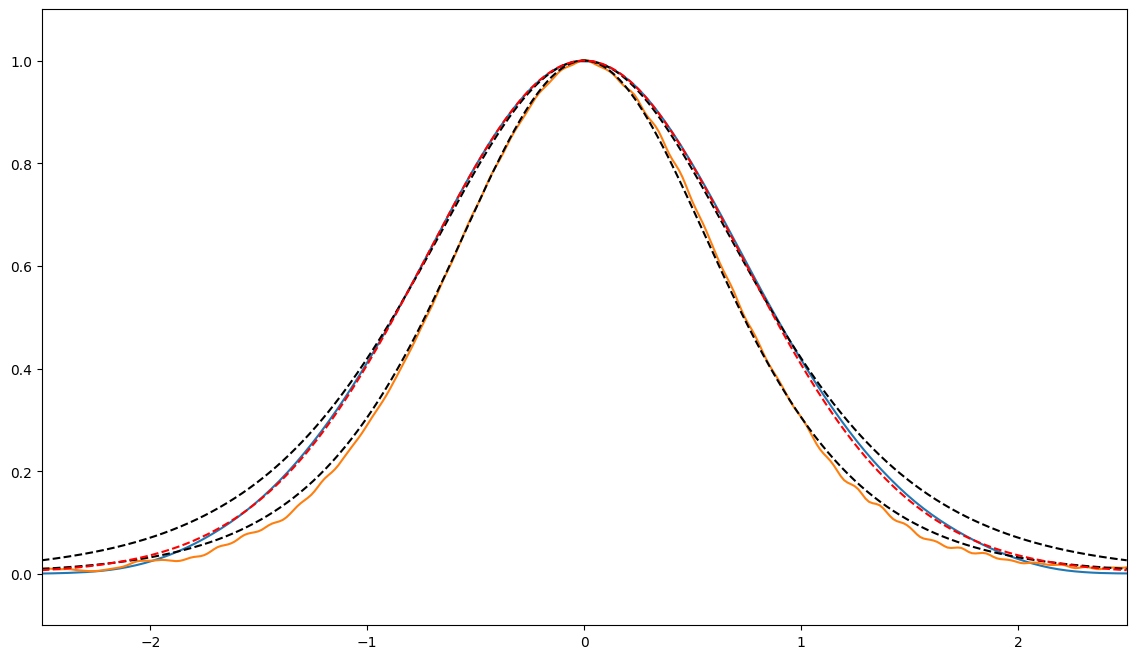

In [8]:
g = np.loadtxt("./_output/_gauges/gauge590.25.txt")
centers = np.array([636.075, 752.265])
amplitudes = np.array([1.53,0.255])
eps = g[:,1]
K = 1
sig = np.exp(K*eps)-1

plt.figure(figsize=(14,8))
j = 1
for (a,c) in zip(amplitudes,centers):
        plt.plot((tt-c)*np.sqrt(a),sig/a, label="stegoton"+str(j))
        j = j+1

plt.plot(t,1./(np.cosh(1.2*t))**2, 'k--', label="sech^2")
plt.plot(t,1./(np.cosh(1.*t))**2, 'k--', label="sech^2")
plt.plot(t,1./(np.cosh(0.43*t))**10, 'r--', label="sech^10")

plt.xlim(-2.5,2.5)
plt.ylim(-0.1,1.1)
#plt.plot(tt,sig)

In [9]:
rho

4

# Generating individual large stegotons

An arbitrary initial pulse, like that used above, tends to break into multiple stegotons.  A larger initial pulse yields larger stegotons, but after a certain point we get shock formation and oscillations instead of taller stegotons.  It seems to be possible to generate taller stegotons by directly initializing with the appropriate shape, which is the strategy we try now.

In [10]:
claw = stegoton_shapes.setup(num_output_times=200,amp=.1,cells_per_layer=40,width=10,tfinal=800.,
                             solver_type="sharpclaw",shape="cos2",xmax=200)
claw.keep_copy = True

claw.run()

2024-06-11 10:52:43,060 INFO CLAW: Solution 0 computed for time t=0.000000
2024-06-11 10:52:43,467 INFO CLAW: Solution 1 computed for time t=4.000000
2024-06-11 10:52:43,879 INFO CLAW: Solution 2 computed for time t=8.000000
2024-06-11 10:52:44,288 INFO CLAW: Solution 3 computed for time t=12.000000
2024-06-11 10:52:44,701 INFO CLAW: Solution 4 computed for time t=16.000000
2024-06-11 10:52:45,108 INFO CLAW: Solution 5 computed for time t=20.000000
2024-06-11 10:52:45,513 INFO CLAW: Solution 6 computed for time t=24.000000
2024-06-11 10:52:45,919 INFO CLAW: Solution 7 computed for time t=28.000000
2024-06-11 10:52:46,318 INFO CLAW: Solution 8 computed for time t=32.000000
2024-06-11 10:52:46,724 INFO CLAW: Solution 9 computed for time t=36.000000
2024-06-11 10:52:47,139 INFO CLAW: Solution 10 computed for time t=40.000000
2024-06-11 10:52:47,538 INFO CLAW: Solution 11 computed for time t=44.000000
2024-06-11 10:52:47,937 INFO CLAW: Solution 12 computed for time t=48.000000
2024-06-11 1

{'cflmax': 1.9550101363414454,
 'dtmin': 0.043950437091918586,
 'dtmax': 0.04860769814317481,
 'numsteps': 18196}

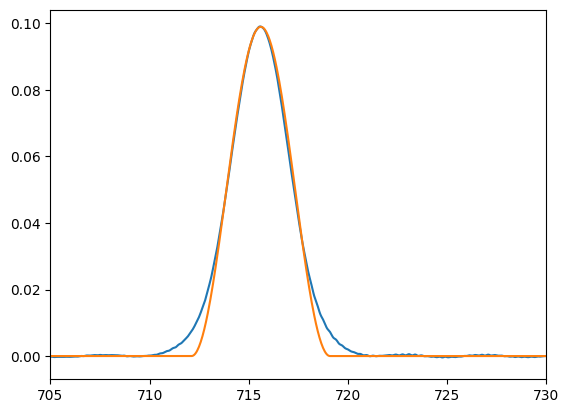

In [11]:
# amp = 0.1
g = np.loadtxt("./_output/_gauges/gauge190.25.txt")
tt = g[:,0]
rhou = g[:,2]
rho = claw.frames[0].aux[0,15]
u = rhou/rho
plt.plot(tt,-u)
plt.xlim(705,730)

w = 0.45
c = 715.6
a = 0.099
plt.plot(tt,a*(np.cos(w*(tt-c)))**2 * (np.abs(tt-c)<=np.pi/(2*w)));

For amplitude 0.1, we see that the tails are substantially larger than those of the $\cos^2$ shape.

In [12]:
claw = stegoton_shapes.setup(num_output_times=200,amp=.25,cells_per_layer=40,width=10,tfinal=800.,
                             solver_type="sharpclaw",shape="cos2",xmax=200)
claw.keep_copy = True

claw.run()

2024-06-11 10:54:04,643 INFO CLAW: Solution 0 computed for time t=0.000000
2024-06-11 10:54:05,059 INFO CLAW: Solution 1 computed for time t=4.000000
2024-06-11 10:54:05,525 INFO CLAW: Solution 2 computed for time t=8.000000
2024-06-11 10:54:05,981 INFO CLAW: Solution 3 computed for time t=12.000000
2024-06-11 10:54:06,432 INFO CLAW: Solution 4 computed for time t=16.000000
2024-06-11 10:54:06,897 INFO CLAW: Solution 5 computed for time t=20.000000
2024-06-11 10:54:07,347 INFO CLAW: Solution 6 computed for time t=24.000000
2024-06-11 10:54:07,796 INFO CLAW: Solution 7 computed for time t=28.000000
2024-06-11 10:54:08,245 INFO CLAW: Solution 8 computed for time t=32.000000
2024-06-11 10:54:08,692 INFO CLAW: Solution 9 computed for time t=36.000000
2024-06-11 10:54:09,139 INFO CLAW: Solution 10 computed for time t=40.000000
2024-06-11 10:54:09,615 INFO CLAW: Solution 11 computed for time t=44.000000
2024-06-11 10:54:10,062 INFO CLAW: Solution 12 computed for time t=48.000000
2024-06-11 1

{'cflmax': 1.9621225843479548,
 'dtmin': 0.03860538435560516,
 'dtmax': 0.04875,
 'numsteps': 20393}

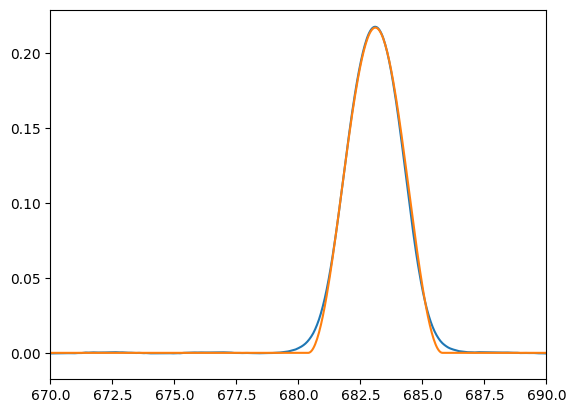

In [13]:
# amp = 0.25
g = np.loadtxt("./_output/_gauges/gauge190.25.txt")
tt = g[:,0]
rhou = g[:,2]
rho = claw.frames[0].aux[0,15]
u = rhou/rho
plt.plot(tt,-u)
plt.xlim(670,690)

w = 0.58
c = 683.1
a = 0.217
plt.plot(tt,a*(np.cos(w*(tt-c)))**2 * (np.abs(tt-c)<=np.pi/(2*w)));

For amplitude 0.25, they are closer.

In [14]:
claw = stegoton_shapes.setup(num_output_times=200,amp=.42,cells_per_layer=40,width=10,tfinal=800.,
                             solver_type="sharpclaw",shape="cos2",xmax=200)
claw.keep_copy = True

claw.run()

2024-06-11 10:55:35,558 INFO CLAW: Solution 0 computed for time t=0.000000
2024-06-11 10:55:35,989 INFO CLAW: Solution 1 computed for time t=4.000000
2024-06-11 10:55:36,489 INFO CLAW: Solution 2 computed for time t=8.000000
2024-06-11 10:55:36,989 INFO CLAW: Solution 3 computed for time t=12.000000
2024-06-11 10:55:37,493 INFO CLAW: Solution 4 computed for time t=16.000000
2024-06-11 10:55:37,994 INFO CLAW: Solution 5 computed for time t=20.000000
2024-06-11 10:55:38,495 INFO CLAW: Solution 6 computed for time t=24.000000
2024-06-11 10:55:38,995 INFO CLAW: Solution 7 computed for time t=28.000000
2024-06-11 10:55:39,489 INFO CLAW: Solution 8 computed for time t=32.000000
2024-06-11 10:55:39,987 INFO CLAW: Solution 9 computed for time t=36.000000
2024-06-11 10:55:40,487 INFO CLAW: Solution 10 computed for time t=40.000000
2024-06-11 10:55:40,984 INFO CLAW: Solution 11 computed for time t=44.000000
2024-06-11 10:55:41,480 INFO CLAW: Solution 12 computed for time t=48.000000
2024-06-11 1

{'cflmax': 1.9706062596396317,
 'dtmin': 0.034020391435697274,
 'dtmax': 0.04875,
 'numsteps': 22703}

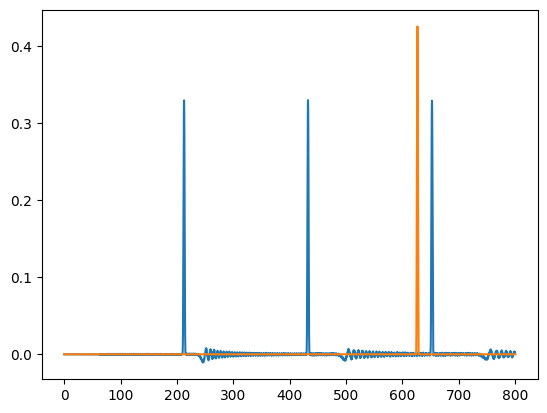

In [15]:
# amp = 0.42
g = np.loadtxt("./_output/_gauges/gauge190.25.txt")
tt = g[:,0]
rhou = g[:,2]
rho = claw.frames[0].aux[0,15]
u = rhou/rho
plt.plot(tt,-u)
#plt.xlim(620,630)

w = 0.7
c = 626.59
a = 0.425
plt.plot(tt,a*(np.cos(w*(tt-c)))**2 * (np.abs(tt-c)<=np.pi/(2*w)));

Here we see a nearly $\cos^2$ shape.

In [16]:
claw = stegoton_shapes.setup(num_output_times=200,amp=.5,cells_per_layer=40,width=10,tfinal=800.,
                             solver_type="sharpclaw",shape="cos2",xmax=200)
claw.keep_copy = True

claw.run()

2024-06-11 10:57:15,848 INFO CLAW: Solution 0 computed for time t=0.000000
2024-06-11 10:57:16,301 INFO CLAW: Solution 1 computed for time t=4.000000
2024-06-11 10:57:16,826 INFO CLAW: Solution 2 computed for time t=8.000000
2024-06-11 10:57:17,350 INFO CLAW: Solution 3 computed for time t=12.000000
2024-06-11 10:57:17,877 INFO CLAW: Solution 4 computed for time t=16.000000
2024-06-11 10:57:18,397 INFO CLAW: Solution 5 computed for time t=20.000000
2024-06-11 10:57:18,915 INFO CLAW: Solution 6 computed for time t=24.000000
2024-06-11 10:57:19,431 INFO CLAW: Solution 7 computed for time t=28.000000
2024-06-11 10:57:19,956 INFO CLAW: Solution 8 computed for time t=32.000000
2024-06-11 10:57:20,472 INFO CLAW: Solution 9 computed for time t=36.000000
2024-06-11 10:57:20,987 INFO CLAW: Solution 10 computed for time t=40.000000
2024-06-11 10:57:21,507 INFO CLAW: Solution 11 computed for time t=44.000000
2024-06-11 10:57:22,029 INFO CLAW: Solution 12 computed for time t=48.000000
2024-06-11 1

{'cflmax': 1.9741109755803978,
 'dtmin': 0.03223094895327942,
 'dtmax': 0.04875,
 'numsteps': 23701}

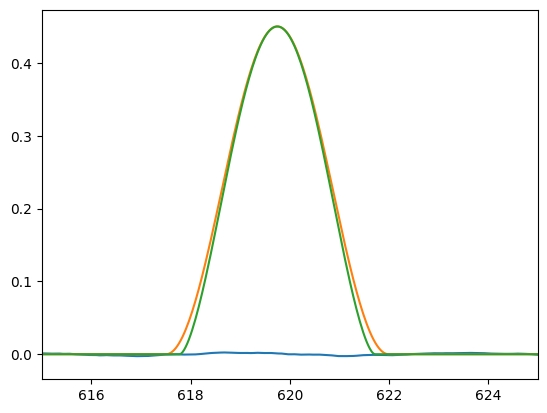

In [17]:
# amp = 0.5
g = np.loadtxt("./_output/_gauges/gauge190.25.txt")
tt = g[:,0]
rhou = g[:,2]
rho = claw.frames[0].aux[0,15]
u = rhou/rho
plt.plot(tt,-u)
plt.xlim(615,625)

w = 0.7
c = 619.75
a = 0.45
plt.plot(tt,a*(np.cos(w*(tt-c)))**2 * (np.abs(tt-c)<=np.pi/(2*w)));

p = 1.6
w = 0.8
cos = np.maximum(np.cos(w*(tt-c)),0)
fit = a*cos**p * (np.abs(tt-c)<=np.pi/(2*w))
#fit = np.real(fit)
plt.plot(tt,fit);

At even larger amplitudes, the stegoton tails are even steeper than $\cos^2$.

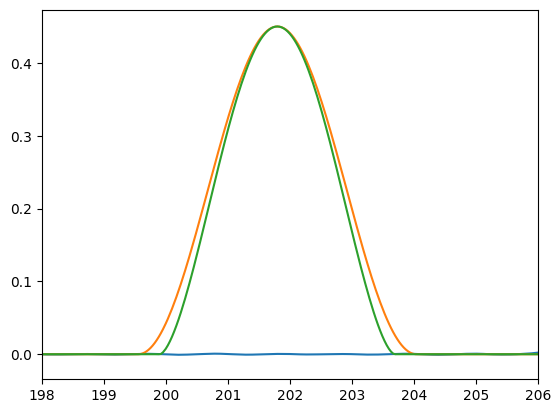

In [18]:
# amp = 0.5
g = np.loadtxt("./_output/_gauges/gauge190.25.txt")
tt = g[:,0]
rhou = g[:,2]
rho = claw.frames[0].aux[0,15]
u = rhou/rho
plt.plot(tt,-u)
plt.xlim(198,206)

w = 0.7
c = 201.8
a = 0.45
plt.plot(tt,a*(np.cos(w*(tt-c)))**2 * (np.abs(tt-c)<=np.pi/(2*w)));

p = 1.6
w = 0.83
cos = np.maximum(np.cos(w*(tt-c)),0)
fit = a*cos**p * (np.abs(tt-c)<=np.pi/(2*w))
#fit = np.real(fit)
plt.plot(tt,fit);

In [19]:
claw = stegoton_shapes.setup(num_output_times=200,amp=.5,cells_per_layer=40,width=10,tfinal=800.,
                             solver_type="sharpclaw",shape="cosp",xmax=200)
claw.keep_copy = True

claw.run()

2024-06-11 10:59:00,725 INFO CLAW: Solution 0 computed for time t=0.000000
2024-06-11 10:59:01,170 INFO CLAW: Solution 1 computed for time t=4.000000
2024-06-11 10:59:01,724 INFO CLAW: Solution 2 computed for time t=8.000000
2024-06-11 10:59:02,271 INFO CLAW: Solution 3 computed for time t=12.000000
2024-06-11 10:59:02,819 INFO CLAW: Solution 4 computed for time t=16.000000
2024-06-11 10:59:03,365 INFO CLAW: Solution 5 computed for time t=20.000000
2024-06-11 10:59:03,913 INFO CLAW: Solution 6 computed for time t=24.000000
2024-06-11 10:59:04,465 INFO CLAW: Solution 7 computed for time t=28.000000
2024-06-11 10:59:05,011 INFO CLAW: Solution 8 computed for time t=32.000000
2024-06-11 10:59:05,580 INFO CLAW: Solution 9 computed for time t=36.000000
2024-06-11 10:59:06,126 INFO CLAW: Solution 10 computed for time t=40.000000
2024-06-11 10:59:06,672 INFO CLAW: Solution 11 computed for time t=44.000000
2024-06-11 10:59:07,308 INFO CLAW: Solution 12 computed for time t=48.000000
2024-06-11 1

{'cflmax': 1.9741795642955835,
 'dtmin': 0.031107764053745685,
 'dtmax': 0.04875,
 'numsteps': 24974}

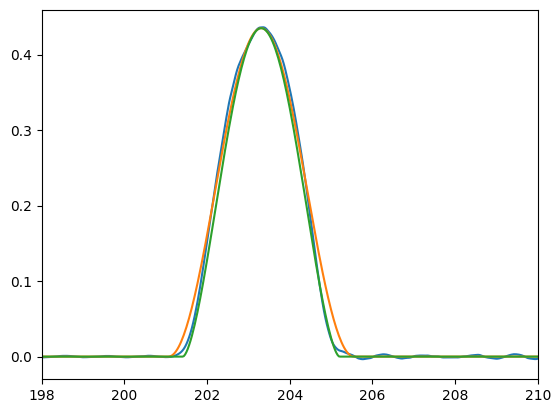

In [20]:
# amp = 0.5
g = np.loadtxt("./_output/_gauges/gauge190.25.txt")
tt = g[:,0]
rhou = g[:,2]
rho = claw.frames[0].aux[0,15]
u = rhou/rho
plt.plot(tt,-u)
plt.xlim(198,210)

w = 0.7
c = 203.31
a = 0.435
plt.plot(tt,a*(np.cos(w*(tt-c)))**2 * (np.abs(tt-c)<=np.pi/(2*w)));

p = 1.6
w = 0.83
cos = np.maximum(np.cos(w*(tt-c)),0)
fit = a*cos**p * (np.abs(tt-c)<=np.pi/(2*w))
#fit = np.real(fit)
plt.plot(tt,fit);

In [21]:
claw = stegoton_shapes.setup(num_output_times=200,amp=0.6,cells_per_layer=40,width=10,tfinal=800.,
                             solver_type="sharpclaw",shape="cosp",xmax=200)
claw.keep_copy = True

claw.run()

2024-06-11 11:00:52,296 INFO CLAW: Solution 0 computed for time t=0.000000
2024-06-11 11:00:52,758 INFO CLAW: Solution 1 computed for time t=4.000000
2024-06-11 11:00:53,338 INFO CLAW: Solution 2 computed for time t=8.000000
2024-06-11 11:00:53,915 INFO CLAW: Solution 3 computed for time t=12.000000
2024-06-11 11:00:54,494 INFO CLAW: Solution 4 computed for time t=16.000000
2024-06-11 11:00:55,073 INFO CLAW: Solution 5 computed for time t=20.000000
2024-06-11 11:00:55,646 INFO CLAW: Solution 6 computed for time t=24.000000
2024-06-11 11:00:56,219 INFO CLAW: Solution 7 computed for time t=28.000000
2024-06-11 11:00:56,794 INFO CLAW: Solution 8 computed for time t=32.000000
2024-06-11 11:00:57,364 INFO CLAW: Solution 9 computed for time t=36.000000
2024-06-11 11:00:57,950 INFO CLAW: Solution 10 computed for time t=40.000000
2024-06-11 11:00:58,560 INFO CLAW: Solution 11 computed for time t=44.000000
2024-06-11 11:00:59,168 INFO CLAW: Solution 12 computed for time t=48.000000
2024-06-11 1

{'cflmax': 1.9788863105216388,
 'dtmin': 0.02909028768284247,
 'dtmax': 0.04875,
 'numsteps': 26370}

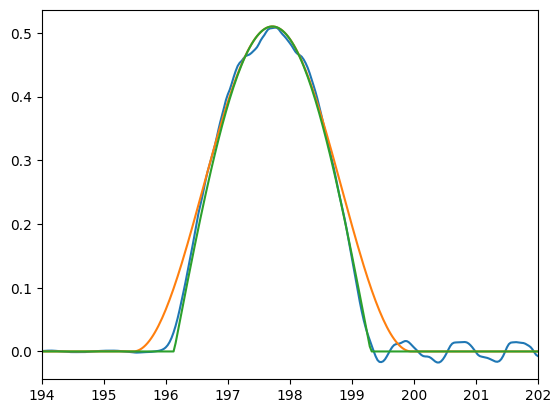

In [22]:
g = np.loadtxt("./_output/_gauges/gauge190.25.txt")
tt = g[:,0]
rhou = g[:,2]
rho = claw.frames[0].aux[0,15]
u = rhou/rho
plt.plot(tt,-u)
plt.xlim(194,202)

w = 0.7
c = 197.72
a = 0.51
plt.plot(tt,a*(np.cos(w*(tt-c)))**2 * (np.abs(tt-c)<=np.pi/(2*w)));

p = 1.
w = 0.99
cos = np.maximum(np.cos(w*(tt-c)),0)
fit = a*cos**p * (np.abs(tt-c)<=np.pi/(2*w))
#fit = np.real(fit)
plt.plot(tt,fit);

In [23]:
claw = stegoton_shapes.setup(num_output_times=200,amp=0.6,cells_per_layer=40,width=10,tfinal=800.,
                             solver_type="sharpclaw",shape="cos1",xmax=200)
claw.keep_copy = True

claw.run()

2024-06-11 11:02:49,984 INFO CLAW: Solution 0 computed for time t=0.000000
2024-06-11 11:02:50,482 INFO CLAW: Solution 1 computed for time t=4.000000
2024-06-11 11:02:51,072 INFO CLAW: Solution 2 computed for time t=8.000000
2024-06-11 11:02:51,684 INFO CLAW: Solution 3 computed for time t=12.000000
2024-06-11 11:02:52,286 INFO CLAW: Solution 4 computed for time t=16.000000
2024-06-11 11:02:52,890 INFO CLAW: Solution 5 computed for time t=20.000000
2024-06-11 11:02:53,492 INFO CLAW: Solution 6 computed for time t=24.000000
2024-06-11 11:02:54,101 INFO CLAW: Solution 7 computed for time t=28.000000
2024-06-11 11:02:54,697 INFO CLAW: Solution 8 computed for time t=32.000000
2024-06-11 11:02:55,294 INFO CLAW: Solution 9 computed for time t=36.000000
2024-06-11 11:02:55,889 INFO CLAW: Solution 10 computed for time t=40.000000
2024-06-11 11:02:56,486 INFO CLAW: Solution 11 computed for time t=44.000000
2024-06-11 11:02:57,083 INFO CLAW: Solution 12 computed for time t=48.000000
2024-06-11 1

{'cflmax': 1.9886428641728782,
 'dtmin': 0.027949553101681637,
 'dtmax': 0.04875,
 'numsteps': 27106}

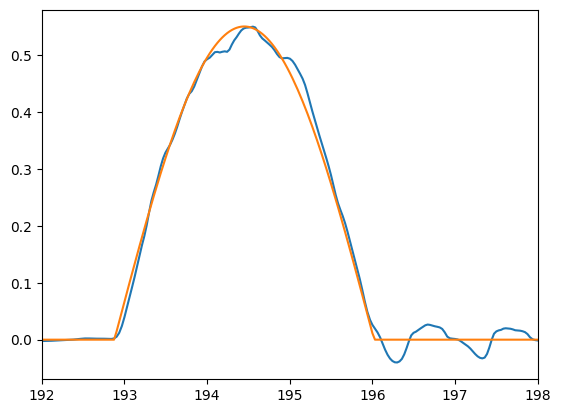

In [24]:
# 40 cells per layer, cosine initialization
g = np.loadtxt("./_output/_gauges/gauge190.25.txt")
tt = g[:,0]
rhou = g[:,2]
rho = claw.frames[0].aux[0,15]
u = rhou/rho
plt.plot(tt,-u)
plt.xlim(192,198)

w = 0.7
c = 194.45
a = 0.55
#plt.plot(tt,a*(np.cos(w*(tt-c)))**2 * (np.abs(tt-c)<=np.pi/(2*w)));

p = 1.
w = 1.
cos = np.maximum(np.cos(w*(tt-c)),0)
fit = a*cos**p * (np.abs(tt-c)<=np.pi/(2*w))
plt.plot(tt,fit);

/var/folders/_c/vkzy1g9s61l_ltdhxmxz2zch0000gp/T/ipykernel_29913/2132435344.py:6: RuntimeWarning: overflow encountered in cosh
  plt.plot(tt,2./(np.cosh(np.sqrt(2)*(tt-c)))**2, 'k')
/var/folders/_c/vkzy1g9s61l_ltdhxmxz2zch0000gp/T/ipykernel_29913/2132435344.py:6: RuntimeWarning: overflow encountered in square
  plt.plot(tt,2./(np.cosh(np.sqrt(2)*(tt-c)))**2, 'k')


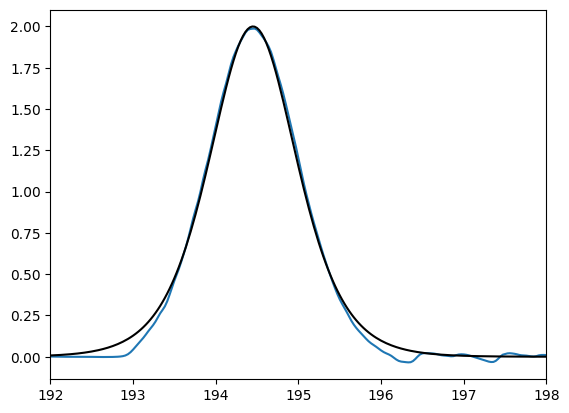

In [25]:
eps = g[:,1]
K = 1.
sig = np.exp(K*eps)-1
plt.plot(tt,sig)
plt.xlim(192,198)
plt.plot(tt,2./(np.cosh(np.sqrt(2)*(tt-c)))**2, 'k')

In [26]:
claw = stegoton_shapes.setup(num_output_times=200,amp=0.6,cells_per_layer=160,width=10,tfinal=800.,
                             solver_type="sharpclaw",shape="cos1",xmax=200)
claw.keep_copy = True

claw.run()

2024-06-11 11:04:51,493 INFO CLAW: Solution 0 computed for time t=0.000000
2024-06-11 11:04:58,649 INFO CLAW: Solution 1 computed for time t=4.000000
2024-06-11 11:05:07,732 INFO CLAW: Solution 2 computed for time t=8.000000
2024-06-11 11:05:16,815 INFO CLAW: Solution 3 computed for time t=12.000000
2024-06-11 11:05:25,904 INFO CLAW: Solution 4 computed for time t=16.000000
2024-06-11 11:05:34,977 INFO CLAW: Solution 5 computed for time t=20.000000
2024-06-11 11:05:44,143 INFO CLAW: Solution 6 computed for time t=24.000000
2024-06-11 11:05:53,224 INFO CLAW: Solution 7 computed for time t=28.000000
2024-06-11 11:06:02,293 INFO CLAW: Solution 8 computed for time t=32.000000
2024-06-11 11:06:11,349 INFO CLAW: Solution 9 computed for time t=36.000000
2024-06-11 11:06:20,447 INFO CLAW: Solution 10 computed for time t=40.000000
2024-06-11 11:06:29,557 INFO CLAW: Solution 11 computed for time t=44.000000
2024-06-11 11:06:40,399 INFO CLAW: Solution 12 computed for time t=48.000000
2024-06-11 1

{'cflmax': 1.9607666336785818,
 'dtmin': 0.00697585092701837,
 'dtmax': 0.0121875,
 'numsteps': 108423}

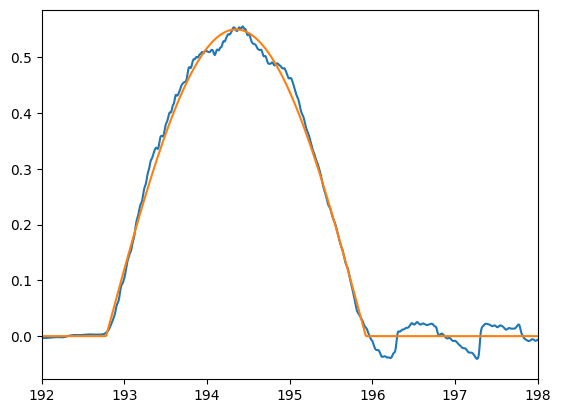

In [27]:
# 160 cells per layer
g = np.loadtxt("./_output/_gauges/gauge190.25.txt")
tt = g[:,0]
rhou = g[:,2]
rho = claw.frames[0].aux[0,15]
u = rhou/rho
plt.plot(tt,-u)
plt.xlim(192,198)

w = 0.7
c = 194.35
a = 0.55
#plt.plot(tt,a*(np.cos(w*(tt-c)))**2 * (np.abs(tt-c)<=np.pi/(2*w)));

p = 1.
w = 1.
cos = np.maximum(np.cos(w*(tt-c)),0)
fit = a*cos**p * (np.abs(tt-c)<=np.pi/(2*w))
#fit = np.real(fit)
plt.plot(tt,fit);

/var/folders/_c/vkzy1g9s61l_ltdhxmxz2zch0000gp/T/ipykernel_29913/2132435344.py:6: RuntimeWarning: overflow encountered in cosh
  plt.plot(tt,2./(np.cosh(np.sqrt(2)*(tt-c)))**2, 'k')
/var/folders/_c/vkzy1g9s61l_ltdhxmxz2zch0000gp/T/ipykernel_29913/2132435344.py:6: RuntimeWarning: overflow encountered in square
  plt.plot(tt,2./(np.cosh(np.sqrt(2)*(tt-c)))**2, 'k')


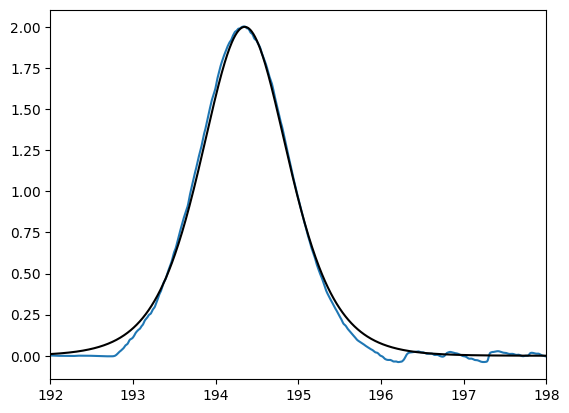

In [28]:
eps = g[:,1]
K = 1.
sig = np.exp(K*eps)-1
plt.plot(tt,sig)
plt.xlim(192,198)
plt.plot(tt,2./(np.cosh(np.sqrt(2)*(tt-c)))**2, 'k')

At this point the stegoton has a rather non-smooth shape.  This seems inevitable, since its width is only about 3 layers of the medium, so it "sees" the microstructure of the medium.  But interestingly, it is quite close to exactly $\alpha\cos(t-c)$.

Furthermore, it's traveling almost exactly at speed 1, which is the maximum speed of propagation for small perturbations (note that the peak originally emerges at $x=0$ at $t=3$, so the speed of this wave is about 0.9936).

# Questions

- What happens to this story as we vary $K$ and $\rho$?  For instance if we keep $K_A=\rho_A=1$ and take $K_B=\rho_B$ larger and larger?
- What if we use some other consitutive relation?  E.g. quadratic?
- What happens if we try to generate larger solitary wave solutions of the homogenized equations?  Is the $c_\text{max}$ limit somehow present there?
- Can we prove that a solitary wave can't move faster than $c_\text{max}$?  The idea is that if the wave is smooth then there is some finite region at the front where the amplitude is $<\epsilon$ and the nonlinearity can't overcome the heterogeneous slow-down.

# Extracting the apex

(29900.0, 30900.0)

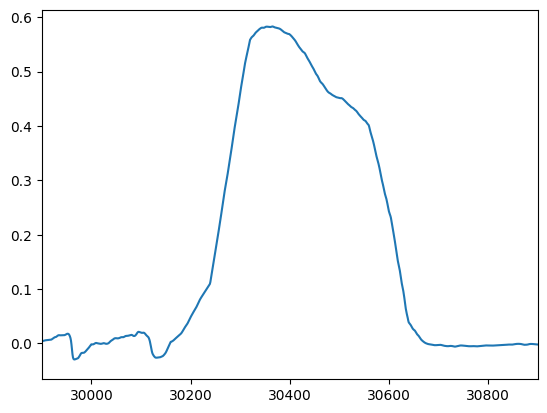

In [29]:
plt.plot(-claw.frames[-1].q[1,:]/claw.frames[-1].aux[0,:])
plt.xlim(29900,30900)

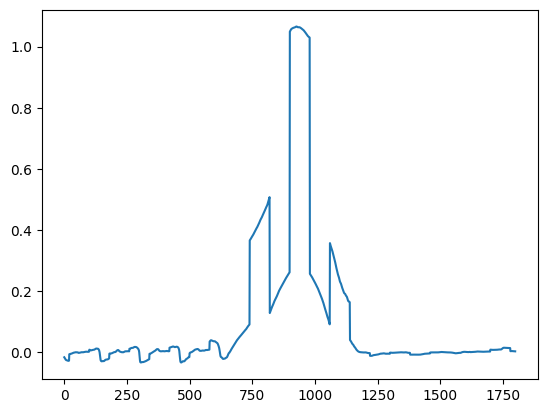

In [30]:
q0 = claw.frames[-1].q.copy()
isteg = [29500,31300]
plt.plot(q0[0,isteg[0]:isteg[1]])

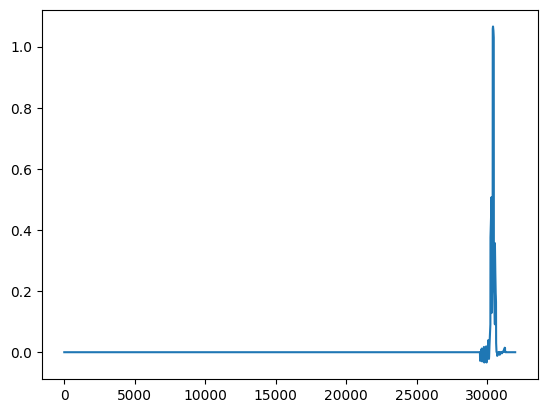

In [31]:
q0[:,:isteg[0]]=0
q0[:,isteg[1]:]=0
plt.plot(q0[0,:])

In [32]:
np.savetxt('apex_160cpl_halfwide.txt',q0)

In [33]:
claw2 = stegoton_shapes.setup(num_output_times=200,cells_per_layer=160,tfinal=800.,
                             solver_type="sharpclaw",xmax=200,ic="./apex_160cpl.txt")
claw2.keep_copy = True

claw2.solver.dt_initial=0.01 # Restarting with the default dt_initial causes a crash

In [1]:
claw2.run()

NameError: name 'claw2' is not defined

In [ ]:
xc = claw2.solution.state.grid.x.centers
q0 = claw2.frames[0].q

plt.plot(xc,q0[0,:])
#plt.xlim(30000,31000)

In [ ]:
q0 = claw2.frames[200].q
#isteg = [30000,30800]
plt.plot(q0[0,:])
plt.xlim(28000,29000)

In [ ]:
# 160 cells per layer
g = np.loadtxt("./_output/_gauges/gauge0.25.txt")
tt = g[:,0]
rhou = g[:,2]
rho = claw2.frames[0].aux[0,15]
u = rhou/rho
plt.plot(tt,-u)
plt.xlim(108,115)

w = 0.7
c = 111.5
a = 0.54

p = 1.
w = 1.
cos = np.maximum(np.cos(w*(tt-c)),0)
fit = a*cos**p * (np.abs(tt-c)<=np.pi/(2*w))
plt.plot(tt,fit);

In [ ]:
# 160 cells per layer
g = np.loadtxt("./_output/_gauges/gauge90.25.txt")
tt = g[:,0]
rhou = g[:,2]
rho = claw2.frames[0].aux[0,15]
u = rhou/rho
plt.plot(tt,-u)
plt.xlim(200,205)

w = 0.7
c = 202.73
a = 0.54

p = 1.
w = 1.
cos = np.maximum(np.cos(w*(tt-c)),0)
fit = a*cos**p * (np.abs(tt-c)<=np.pi/(2*w))
plt.plot(tt,fit);

In [ ]:
plt.plot(claw2.frames[-1].q[0,:])
plt.xlim(24000,29000)

In [ ]:
q0 = claw.frames[-1].q.copy()
isteg = [7450,7700]
plt.plot(q0[0,isteg[0]:isteg[1]])

In [ ]:
q0[:,:isteg[0]]=0
q0[:,isteg[1]:]=0
plt.plot(q0[0,:])

In [ ]:
np.savetxt('apex_40cpl.txt',q0)

In [ ]:
claw2 = stegoton_shapes.setup(num_output_times=200,cells_per_layer=40,tfinal=800.,
                             solver_type="sharpclaw",xmax=200,ic="./apex_40cpl.txt")
claw2.keep_copy = True

claw2.run()

In [ ]:
# 40 cells per layer
g = np.loadtxt("./_output/_gauges/gauge190.25.txt")
tt = g[:,0]
rhou = g[:,2]
rho = claw2.frames[0].aux[0,15]
u = rhou/rho
plt.plot(tt,-u)
plt.xlim(595,601)

w = 0.7
c = 598.36
a = 0.54

p = 1.
w = 1.
cos = np.maximum(np.cos(w*(tt-c)),0)
fit = a*cos**p * (np.abs(tt-c)<=np.pi/(2*w))
plt.plot(tt,fit);

In [ ]:
eps = g[:,1]
K = 1.
sig = np.exp(K*eps)-1
plt.plot(tt,sig)
plt.xlim(595,601)
plt.plot(tt,2./(np.cosh(np.sqrt(2)*(tt-c)))**2, 'k')

In [ ]:
g = np.loadtxt("./_output/_gauges/gauge190.25.txt")
tt = g[:,0]
rhou = g[:,2]
rho = claw2.frames[0].aux[0,15]
u = rhou/rho
plt.plot(tt,-u)
plt.ylim(-0.1,0.1)

In [ ]:
plt.plot(claw2.frames[10].q[0,:])
#plt.xlim(7400,7700)